In [37]:
import pandas as pd
from pycaret.regression import *
import warnings
warnings.filterwarnings('ignore')
%load_ext autotime
%timeit

Def=pd.read_csv(r'C:\Users\Home\Documents\squad defensive actions\Defensive Actions\DA_final.csv')
npxga=pd.read_csv(r'C:\Users\Home\Documents\squad defensive actions\npxgxa\final_npxgxa.csv')

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 50.6 ms


In [38]:
### Merging data with another dataset ###
Def1=pd.merge(Def,npxga,on=['Squad','Year'],how='left').reset_index(drop=True)
del Def1['Year']

time: 20.2 ms


In [48]:
### Eliminating the first 3 columns= name, #pl,starts. i.e. keeping only performance stats ###
Def2=Def1.iloc[:,3:]

#intialize the setup (in Notebook env)
exp_reg = setup(data=Def2, target = 'npxG+xA', feature_selection = True,
               remove_multicollinearity = True, multicollinearity_threshold = 0.6,feature_selection_threshold=0.5,
               feature_selection_method='classic') 

time: 3.83 s


In [44]:
### comparing models ###
best = compare_models(exclude = ['ransac'])
# return top 3 models based on R2
#top3 = compare_models(n_select = 3)

time: 5min 10s


In [45]:
# train a decision tree model with default parameters
ada = create_model('ada')
# predictions on hold-out set
omp_pred_holdout = predict_model(ada)

time: 13.2 s


In [46]:
ada_final = finalize_model(ada)

time: 14.2 s


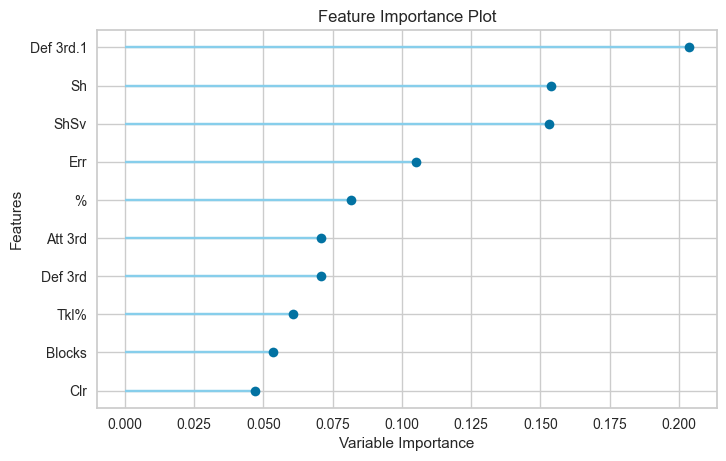

time: 612 ms


In [47]:
# plot a model 
plot_model(ada_final,plot='feature')

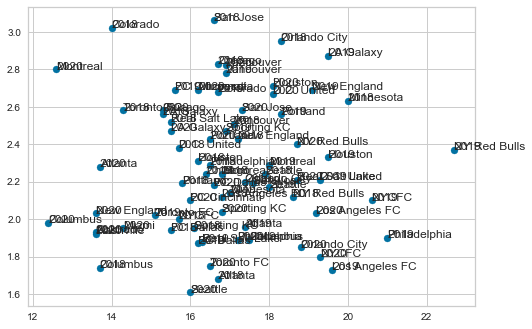

time: 1.31 s


In [31]:
import matplotlib.pyplot as plt

z=Def1.Att
y=Def1['npxG+xA']
n=Def1['Squad']
k=Def1['Year']

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))
    
for i, txt1 in enumerate(k):
    ax.annotate(txt1, (z[i], y[i]))

In [27]:
Def1

Squad  # Pl  90s   Tkl   TklW  Def 3rd  Mid 3rd  Att 3rd  Tkl.1  \
0       Atlanta    26   34  16.5  10.40     8.71     5.68     2.12   5.38   
1       Chicago    31   34  17.2  10.10     9.18     6.26     1.74   6.29   
2      Colorado    29   34  14.2   8.21     7.21     5.71     1.29   3.97   
3      Columbus    27   34  14.4   9.85     7.74     4.82     1.88   4.91   
4   D.C. United    27   34  14.9   9.47     8.32     4.94     1.65   5.26   
..          ...   ...  ...   ...    ...      ...      ...      ...    ...   
68     San Jose    27   23  17.8  11.70     9.22     6.48     2.09   6.09   
69      Seattle    27   22  17.8  11.20     8.91     6.86     2.05   6.27   
70  Sporting KC    23   21  17.0  11.30     7.67     6.38     2.90   6.33   
71   Toronto FC    29   23  16.7  10.90     8.39     6.13     2.22   5.96   
72    Vancouver    27   23  17.1  10.20     9.83     5.17     2.13   5.83   

     Att  ...    Sh  ShSv   Pass   Int  Tkl+Int   Clr   Err  Year  xG+xA  \
0   16.7  ...  2.32  0.06  11.40  6.82     23.3  14.7  0.24  2018   1.83   
1   16.7  ...  2.97  0.09  10.20  8.94     26.1  22.3  0.38  2018   2.96   
2   14.0  ...  3.91  0.12   9.21  8.32     22.5  21.4  0.24  2018   3.13   
3   13.7  ...  2.53  0.03  11.20  7.94     22.4  17.6  0.32  2018   1.85   
4   15.7  ...  4.94  0.06  12.80  8.18     23.1  23.8  0.26  2018   2.42   
..   ...  ...   ...   ...    ...   ...      ...   ...   ...   ...    ...   
68  17.3  ...  3.61  0.04  11.50  6.61     24.4  16.0  0.48  2020   2.71   
69  16.0  ...  2.68  0.05   9.91  6.82     24.6  21.4  0.18  2020   1.68   
70  16.8  ...  2.14  0.05  13.00  6.48     23.4  22.3  0.10  2020   2.11   
71  16.5  ...  2.48  0.04  12.10  4.13     20.9  19.2  0.35  2020   1.85   
72  16.9  ...  4.78  0.04  12.80  7.09     24.2  23.6  0.26  2020   2.92   

    npxG+xA  
0      1.68  
1      2.83  
2      3.02  
3      1.74  
4      2.38  
..      ...  
68     2.58  
69     1.61  
70     2.04  
71     1.75  
72     2.82  

[73 rows x 29 columns]

time: 78.8 ms
